In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
import os
print (os.getcwd())

c:\Users\Jubabouche\Documents\Cours\M2-CNI\Master Thesis\workspace\model\src\scripts


**Import DATASET**
----
Convert TXT file to CSV

In [3]:
dataframe = pd.read_csv("../../datasets/fakenews_twitter.txt","\t")
dataframe.head()

C:\Users\Jubabouche\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (28,32,36,37,38,41,42,43,47,49,50,51,52,54,55,56,57,58,59,60,61,77) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,status_id,"user_id""",created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,retweeted,hashtag,class
0,1000002612593340417,107773189,2018-05-25 13:16:16,gregpak,US House of Representatives switchboard: 202-2...,Twitter Web Client,134,1000002117883613184,107773189,gregpak,...,TRUE,https://t.co/YIcLODi3nr,https://www.patreon.com/gregpak,NaN,https://pbs.twimg.com/profile_banners/10777318...,http://abs.twimg.com/images/themes/theme14/bg.gif,http://pbs.twimg.com/profile_images/1252568565...,FALSE,#fakenews,neutral
1,1000004118893576192,115563016,2018-05-25 13:22:15,cipherstorm,Tech companies to disclose foreign software pr...,dlvr.it,273,NaN,NaN,NaN,...,FALSE,http://t.co/ePzKQxQ0fq,http://www.cipherstormgroup.com,NaN,https://pbs.twimg.com/profile_banners/11556301...,http://abs.twimg.com/images/themes/theme16/bg.gif,http://pbs.twimg.com/profile_images/7882721430...,FALSE,#fakenews,neutral
2,1000005653258096640,437779297,2018-05-25 13:28:21,Bangladesh_BN,The US House of Representatives has passed the...,Twitter Web Client,221,NaN,NaN,NaN,...,FALSE,https://t.co/9VcyQsxITC,http://thebengalnewz.com,NaN,https://pbs.twimg.com/profile_banners/43777929...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9417490674...,FALSE,#fakenews,neutral
3,1000005717523353602,828478817501069314,2018-05-25 13:28:36,AmitKum56299182,Bangladesh_BN : The US House of Representative...,IFTTT,272,NaN,NaN,NaN,...,FALSE,NaN,NaN,NaN,NaN,NaN,http://abs.twimg.com/sticky/default_profile_im...,FALSE,#fakenews,neutral
4,1000008136940548096,2364835351,2018-05-25 13:38:13,thomas2765us,U.S. House of Representatives: @NancyPelosi: R...,Twitter Web Client,146,NaN,NaN,NaN,...,FALSE,NaN,NaN,NaN,NaN,http://abs.twimg.com/images/themes/theme1/bg.png,http://abs.twimg.com/sticky/default_profile_im...,FALSE,#fakenews,neutral


In [4]:
print(dataframe.columns)

Index(['status_id', 'user_id"', 'created_at', 'screen_name', 'text', 'source',
       'display_text_width', 'reply_to_status_id', 'reply_to_user_id',
       'reply_to_screen_name', 'is_quote', 'is_retweet', 'favorite_count',
       'retweet_count', 'quote_count', 'reply_count', 'hashtags', 'symbols',
       'urls_url', 'urls_t.co', 'urls_expanded_url', 'media_url', 'media_t.co',
       'media_expanded_url', 'media_type', 'ext_media_url', 'ext_media_t.co',
       'ext_media_expanded_url', 'ext_media_type', 'mentions_user_id',
       'mentions_screen_name', 'lang', 'quoted_status_id', 'quoted_text',
       'quoted_created_at', 'quoted_source', 'quoted_favorite_count',
       'quoted_retweet_count', 'quoted_user_id', 'quoted_screen_name',
       'quoted_name', 'quoted_followers_count', 'quoted_friends_count',
       'quoted_statuses_count', 'quoted_location', 'quoted_description',
       'quoted_verified', 'retweet_status_id', 'retweet_text',
       'retweet_created_at', 'retweet_source',

Remove not useful information for analytics

In [5]:
df = dataframe.drop(columns=[
    "profile_image_url", "profile_background_url", "profile_banner_url",
    "profile_expanded_url", "profile_url", "url", "description", "location",
    "name", "country_code", "geo_coords", "coords_coords","bbox_coords",
    "status_url", "place_type", "place_full_name", "place_name", "place_url",
    "account_lang", "screen_name", "display_text_width", "symbols",
    "urls_url", "urls_t.co", "urls_expanded_url", "media_url", "media_t.co",
    "media_type", "ext_media_type", "ext_media_url", "ext_media_t.co", 
    "ext_media_expanded_url", "ext_media_type", "mentions_user_id",
    "mentions_screen_name", "lang", "quoted_status_id", "quoted_text",
    "quoted_created_at", "quoted_source", "quoted_favorite_count",
    "media_expanded_url", "quoted_user_id", "quoted_screen_name",
    'retweet_user_id','retweet_retweet_count', 'retweet_favorite_count',
    'retweet_followers_count', 'retweet_source', 'retweet_created_at', 
    'retweet_friends_count', 'retweet_statuses_count', 'quote_count',
    'reply_count', 'quoted_friends_count', 'quoted_statuses_count',
    'quoted_followers_count', 'quoted_retweet_count',
    'reply_to_status_id', 'reply_to_user_id', 'hashtags', 'reply_to_screen_name',
    'protected',
    ])

dataframe.columns

Index(['status_id', 'user_id"', 'created_at', 'screen_name', 'text', 'source',
       'display_text_width', 'reply_to_status_id', 'reply_to_user_id',
       'reply_to_screen_name', 'is_quote', 'is_retweet', 'favorite_count',
       'retweet_count', 'quote_count', 'reply_count', 'hashtags', 'symbols',
       'urls_url', 'urls_t.co', 'urls_expanded_url', 'media_url', 'media_t.co',
       'media_expanded_url', 'media_type', 'ext_media_url', 'ext_media_t.co',
       'ext_media_expanded_url', 'ext_media_type', 'mentions_user_id',
       'mentions_screen_name', 'lang', 'quoted_status_id', 'quoted_text',
       'quoted_created_at', 'quoted_source', 'quoted_favorite_count',
       'quoted_retweet_count', 'quoted_user_id', 'quoted_screen_name',
       'quoted_name', 'quoted_followers_count', 'quoted_friends_count',
       'quoted_statuses_count', 'quoted_location', 'quoted_description',
       'quoted_verified', 'retweet_status_id', 'retweet_text',
       'retweet_created_at', 'retweet_source',

In [6]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True, ascending= False)
print(missing_value_df)

                     percent_missing
retweet_verified           99.975289
retweet_description        99.975289
retweet_name               99.898068
retweet_screen_name        99.884168
retweet_text               99.863318
retweet_status_id          99.852507
retweet_location           99.839380
country                    97.180651
quoted_location            96.572148
quoted_description         95.972139
quoted_verified            95.874840
quoted_name                95.860168
class                       2.893481
hashtag                     2.874176
retweeted                   2.873403
account_created_at          2.872631
favourites_count            2.542896
statuses_count              2.542124
is_retweet                  2.350615
is_quote                    2.328221
verified                    2.254089
retweet_count               2.215478
favorite_count              2.160651
followers_count             2.130535
friends_count               2.129763
listed_count                2.129763
s

Clean the mostly NaN fields

In [7]:
df = df.drop(columns=[
    'retweet_verified', 'retweet_description', 'retweet_name', 'retweet_screen_name', 'retweet_text',
    'retweet_status_id', 'retweet_location', 'country', 'quoted_location', 'quoted_description', 'quoted_verified',
    'quoted_verified', 'quoted_name', 'account_created_at', 'verified', 'retweeted', 'source', 'is_quote'])

df.head()

,status_id,"user_id""",created_at,text,is_retweet,favorite_count,retweet_count,followers_count,friends_count,listed_count,statuses_count,favourites_count,hashtag,class
0,1000002612593340417,107773189,2018-05-25 13:16:16,US House of Representatives switchboard: 202-2...,FALSE,5,2,50318,2403,0,95917,34362,#fakenews,neutral
1,1000004118893576192,115563016,2018-05-25 13:22:15,Tech companies to disclose foreign software pr...,FALSE,0,0,2028,1996,98,161925,0,#fakenews,neutral
2,1000005653258096640,437779297,2018-05-25 13:28:21,The US House of Representatives has passed the...,FALSE,6,2,20491,22,55,11419,16991,#fakenews,neutral
3,1000005717523353602,828478817501069314,2018-05-25 13:28:36,Bangladesh_BN : The US House of Representative...,FALSE,0,0,39,228,0,5542,0,#fakenews,neutral
4,1000008136940548096,2364835351,2018-05-25 13:38:13,U.S. House of Representatives: @NancyPelosi: R...,FALSE,0,0,3,11,1,1576,6,#fakenews,neutral


Correct typing

In [8]:
df.dtypes

status_id           object
user_id"            object
created_at          object
text                object
is_retweet          object
favorite_count      object
retweet_count       object
followers_count     object
friends_count       object
listed_count        object
statuses_count      object
favourites_count    object
hashtag             object
class               object
dtype: object

In [9]:
# SET NUMERICAL VALUES

df['favorite_count'] = df['favorite_count'].apply(pd.to_numeric, errors='coerce').astype(pd.Int64Dtype())
df['retweet_count'] = df['retweet_count'].apply(pd.to_numeric, errors='coerce').astype(pd.Int64Dtype())
df['followers_count'] = df['followers_count'].apply(pd.to_numeric, errors='coerce').astype(pd.Int64Dtype())
df['friends_count'] = df['friends_count'].apply(pd.to_numeric, errors='coerce').astype(pd.Int64Dtype())
df['listed_count'] = df['listed_count'].apply(pd.to_numeric, errors='coerce').astype(pd.Int64Dtype())
df['statuses_count'] = df['statuses_count'].apply(pd.to_numeric, errors='coerce').astype(pd.Int64Dtype())
df['favourites_count'] = df['favourites_count'].apply(pd.to_numeric, errors='coerce').astype(pd.Int64Dtype())

# SET DATETIME VALUES

df['created_at'] = df['created_at'].apply(pd.to_datetime, errors='coerce')
df['created_at'] = df['created_at'].apply(pd.to_datetime, errors='coerce')

# SET BOOLEAN VALUES

df['is_retweet'] = df['is_retweet'].astype(dtype = bool)





Delete Non assesed rows (Class & Hastag)

In [10]:
count_class = {"neutral": 0, "nan": 0, "hatespeech": 0, "positive": 0, "offensive":0, "sexism": 0 }
count_hashtag = {"fakenews": 0, "nan": 0, "neutral": 0, "hatespeech": 0, "offensive": 0}

for i, row in df.iterrows():
    if (row['class'] == 'neutral'):
        count_class["neutral"] = count_class["neutral"] + 1
    elif (row['class'] == 'hatespeech'):
      count_class['hatespeech'] = count_class['hatespeech'] + 1
    elif (row['class'] == 'positive'):
      count_class['positive'] = count_class['positive'] + 1
    elif (row['class'] == 'offensive'):
      count_class['offensive'] = count_class['offensive'] + 1
    elif (row['class'] == 'sexism'):
        count_class['sexism'] = count_class['sexism']+ 1
    else:
        count_class['nan'] = count_class['nan']+ 1

    if (row['hashtag'] == 'neutral'):
        count_hashtag["neutral"] = count_hashtag["neutral"] + 1
    elif (row['hashtag'] == 'hatespeech'):
      count_hashtag['hatespeech'] = count_hashtag['hatespeech'] + 1
    elif (row['hashtag'] == '#fakenews'):
      count_hashtag['fakenews'] = count_hashtag['fakenews'] + 1
    elif (row['hashtag'] == 'offensive'):
      count_hashtag['offensive'] = count_hashtag['offensive'] + 1
    else:
        count_hashtag['nan'] = count_hashtag['nan']+ 1


print(count_class)
print(count_hashtag)

{'neutral': 101364, 'nan': 3747, 'hatespeech': 19546, 'positive': 2337, 'offensive': 2460, 'sexism': 44}
{'fakenews': 125751, 'nan': 3722, 'neutral': 21, 'hatespeech': 3, 'offensive': 1}


User Mapping and followers distribution over the dataset

In [12]:
user_ids = []
followers_count = []
status_count = []
df_sorted_by_follower_count = df.sort_values(by=['followers_count'], ascending=False)
for i, item in df_sorted_by_follower_count.iterrows() :
    if not(item['user_id"'] in user_ids) and pd.notna(item['followers_count']) and pd.notna(item['statuses_count']):
        user_ids.append(item['user_id"'])
        followers_count.append(item["followers_count"])
        status_count.append(item["statuses_count"])




data = {
    'Users': user_ids,
    'Status_Count': status_count,
    'Followers_Count' : followers_count, 
}




[]

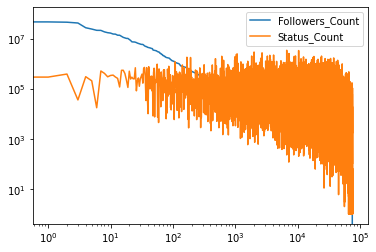

In [13]:


df_to_plot = pd.DataFrame(data)

df_to_plot.plot()
plt.loglog()
# df_to_plot.plot(x='Users', y='Followers_Count', kind= 'bar' )
# plt.show


Segment Fake and Accurate posts by their filter

In [ ]:
## Check for accurate news 



In [14]:
## What's up with NaN
nan_class = []
for i, item in df.iterrows():
    if item['class'] == 'nan':
        nan_class.append(item['text'])

nan_class

[]

In [30]:
## What's up with hatespeech hashtag


peek = []
for i, item in df.iterrows():
    if item['class'] == 'neutral':
        peek.append({item['text'], item['hashtag']})
        
peek

[{'#fakenews',
  'US House of Representatives switchboard: 202-225-3121\r\nUS Senate switchboard: 202-224-3121\r\nAsk your reps to speak out about this TODAY.'},
 {'#fakenews',
  'Tech companies to disclose foreign software probes under US Bill: Report: The Bill still needs to pass the full Senate and be reconciled with the House of Representatives version of that legislation before being signed by US President Donald Trump,� https://t.co/SMDxJtSF4W'},
 {'#fakenews',
  'The US House of Representatives has passed the Fiscal Year 2019 National Defence Authorisation Act that includes sanctions on #Myanmar officials responsible for ethnic cleansing. | @Refugees RT@BengalNewz @BengalNewzWorld'},
 {'#fakenews',
  'Bangladesh_BN : The US House of Representatives has passed the Fiscal Year 2019 National Defence Authorisation Act that includes sanctions on #Myanmar officials responsible for ethnic cleansing. | Refugees RTBengalNewz BengalNewzWorld (via Twitter https://t.co/h3AJMU5Ga2)'},
 {'#fa